# Data Quality Assessment
In diesem Dokument werden die Daten aus dem erhaltenen Extrakt veranschaulicht und analysiert. Dabei liegt das Augenmerk auf folgende Kriterien:
1. Format der erhaltenen Daten
1. Unsere Interpretation der Daten
1. Umfang der Daten
    * Dublikate
    * Null Werte
    * Umfang ohne Dublikate und Null Werte
    * Verteilung von Anfragen auf Antworten
1. Beispiele von guten / schlechten Nachrichten

In [1]:
import warnings
warnings.filterwarnings('ignore')

### 1. Format der erhaltenen Daten
Die Daten _chatbot_extract-2_csv.csv_ wurden in einem CSV-Format geliefert. Dieses Format eignet sich  gut, da sie sehr leicht mithilfe von pandas eingelesen werden kann.

In [2]:
import pandas as pd

extract = '../01_data/extract_final.csv'
names=['ticket', 'type', 'mandant', 'creator', 'inquiry', 'state', 'meta']

corpus = pd.read_csv(extract, sep=',', encoding='ansi', names=names, skiprows=[0])
corpus['ticket'] = corpus['ticket'].astype(str)

corpus.head()

,ticket,type,mandant,creator,inquiry,state,meta
0,2019030563000120,Fehler in der App,SVBA,3,Ich kann die Bilder in übungen nicht Bearbeite...,closed_waiting_for_reply,App: beook 5.5.0 | Model: 4 cores | Platform: ...
1,2019030563000120,Fehler in der App,SVBA,1,Wir haben Ihre Support-Anfrage erhalten besten...,closed_waiting_for_reply,App: beook 5.5.0 | Model: 4 cores | Platform: ...
2,2019030563000020,Fehler in der App,SVBA,3,Bei mir erscheinen eingefügte Bilder im Fachre...,closed_waiting_for_reply,App: beook 5.5.0 | Model: 4 cores | Platform: ...
3,2019030563000020,Fehler in der App,SVBA,1,Damit wir das Problem besser eingrenzen können...,closed_waiting_for_reply,App: beook 5.5.0 | Model: 4 cores | Platform: ...
4,2019030463000110,Fehler in der App,FOMA,1,Besten Dank für Ihre Support-Anfrage. Wir verm...,closed_waiting_for_reply,App: beook 5.5.0 | Model: 4 cores | Platform: ...


### 2. Unsere Interpretation der Daten
| Art      | Beschreibung                                                                                         |
|----------|------------------------------------------------------------------------------------------------------|
| ticket   | Das ist die Kategorie welcher vom Ersteller des Tickets aus einer Dropdown Box gewählt wird.         |
| customer | Das Unternehmen des Kunden.                                                                          |
| inquiry  | Das ist die Support Anfrage die gestellt wird.                                                       |
| state    | Beschreibt den aktuellen Zustand des Tickets.                                                        |
| answer   | Anhand dieser Antwort Kategorie wird die korrekte Anleitung gewählt werden, welche das Problem löst. |

### 3. Umfang der Daten
Das Extrakt enthält _3896 Support Anfragen_. Davon sind _3784 unique_. Diese werden nun auf folgende Punkte untersucht:
* Dublikate
* Null Werte
* Umfang ohne Dublikate und Null Werte
* Verteilung von Anfragen auf Antworten

In [3]:
corpus.describe(include='all')

,ticket,type,mandant,creator,inquiry,state,meta
count,5170,5170,5170,5170.000000,3896,5134,5134
unique,2714,10,31,NaN,3784,47,2664
top,2018082963000410,Fehler in der App,hep,NaN,Falls Sie ein Problem mit der Anmeldung oder d...,closed successful,App: beook 5.0.5 | Model: 4 cores | Platform: ...
freq,3,2186,1016,NaN,28,2866,29
mean,NaN,NaN,NaN,1.949323,NaN,NaN,NaN
std,NaN,NaN,NaN,0.998812,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,3.000000,NaN,NaN,NaN


#### Dublikate
Das Extrakt enthält _1388 Dublikate_ Einträge

In [4]:
import numpy as np

corpus['inquiry'] = corpus['inquiry'].str.lower()
dublicates = np.sum(corpus.duplicated(subset='inquiry'))
print(f'count: {dublicates}')

corpus[corpus.duplicated(subset='inquiry')][:5]

count: 1388


,ticket,type,mandant,creator,inquiry,state,meta
19,2019022763000120,Fehler in der App,VELEDES,3,NaN,closed_waiting_for_reply,App: beook 5.5.0 | Model: 8 cores | Platform: ...
20,2019022763000120,Fehler in der App,VELEDES,1,NaN,closed_waiting_for_reply,App: beook 550 | Model: 8 cores | Platform: ar...
33,2019022663000110,Fehler in der App,SVBA,1,wir haben ihre support-anfrage erhalten best...,closed successful,App: beook 5.5.0 | Model: 2 cores | Platform: ...
34,2019022663000110,Fehler in der App,SVBA,3,ich habe einen anzeige fehler bei mehreren büc...,closed successful,App: beook 5.5.0 | Model: 2 cores | Platform: ...
87,2019021963000110,Fehler in der App,Swissmem,1,NaN,closed_waiting_for_reply,App: Swissmem eBOOK 550 | Model: 8 cores | Pla...


#### Null Werte
Im Extrakt befindet _1274 Zeilen_ mit einem Null Wert bei der Support Anfrage.

In [5]:
len(corpus[corpus.inquiry.isnull()])

1274

#### Umfang ohne Dublikate und Null Werte 

In [6]:
corpus.drop_duplicates(subset='inquiry', keep='last', inplace=True)
corpus.dropna(axis='rows', how='any', inplace=True)

In [7]:
corpus.describe(include='all')

,ticket,type,mandant,creator,inquiry,state,meta
count,3752,3752,3752,3752.000000,3752,3752,3752
unique,2201,8,31,NaN,3752,32,2178
top,2018082963000410,Anmeldung / Aktivierung,SVBA,NaN,wir haben alle ihre geräte auf dem lizenzser...,closed successful,User account exists: Yes | | App: beook v5.4.4...
freq,3,1526,790,NaN,1,2069,6
mean,NaN,NaN,NaN,1.988273,NaN,NaN,NaN
std,NaN,NaN,NaN,1.000065,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,3.000000,NaN,NaN,NaN


#### Verteilung von Anfragen auf Antworten
Überprüfen wir ob jede Frage Ticket (nr. 3) ein Antwort Ticket hat (nr. 1).

In [8]:
new_corpus = corpus[corpus.duplicated(subset='ticket', keep=False)]
print(len(new_corpus))

new_corpus.sort_values(by=['ticket', 'creator'], ascending=[True, False], inplace=True)
new_corpus[:5]

3101


,ticket,type,mandant,creator,inquiry,state,meta
5168,2015081263000080,Fehler in der App,hep,3,habe soeben gesb ah gelöscht und danach die ap...,closed successful,User account exists: Yes | | App: eLehrmittel ...
5167,2015081263000080,Fehler in der App,hep,1,danke habe es korrigiert. war ein seltener fa...,closed successful,User account exists: Yes | | App: eLehrmittel ...
5166,2015081763000050,Anmeldung / Aktivierung,AppInbox,3,das elehrmittel funktioniert auf meinem gerät ...,closed successful,App: eLehrmittel 3.0.9 | Model: 4 cores | Plat...
5165,2015081763000050,Anmeldung / Aktivierung,AppInbox,1,guten tag herr hirsiger können sie uns bitte m...,closed successful,App: eLehrmittel 3.0.9 | Model: 4 cores | Plat...
5164,2015081763000060,Anmeldung / Aktivierung,AppInbox,3,falls sie ein problem mit der anmeldung oder d...,closed successful,App: eLehrmittel 3.0.9 | Model: 4 cores | Plat...


#### n tickets kommen mehr als 2mal vor
weil die Zahl 3101 ungerade ist

In [9]:
new_corpus.loc[new_corpus['ticket'] == '2018082963000410']

,ticket,type,mandant,creator,inquiry,state,meta
1431,2018082963000410,Fehler in der App,VEL,3,"im fachbuch \""fk\"" gehe die seitenlink im sac...",closed successful,App: beook 5.4.3 | Model: 12 cores | Platform:...
1432,2018082963000410,Fehler in der App,VEL,3,wie schon gemeldet habe ich das gleiche proble...,closed successful,App: beook 5.4.3 | Model: 12 cores | Platform:...
1433,2018082963000410,Fehler in der App,VEL,1,guten tag thomas gabathuler besten dank für d...,closed successful,App: beook 5.4.3 | Model: 12 cores | Platform:...


In [10]:
new_corpus.drop([1432], inplace=True)
len(new_corpus)

3100

#### bereinigte Daten exportieren

In [11]:
export_csv = new_corpus.to_csv (r'./ionesoft_extract_2_clean.csv', index=None, header=True)

#### alle fragen und antworten aneinander hänken

In [22]:
# nach powershell matching
import pandas as pd

extract = '../01_data/correlation_quest_answer.csv'
names=['ticket', 'type', 'mandant', 'creator', 'inquiry', 'state', 'meta', 'answer']

corpus = pd.read_csv(extract, sep=',', encoding='utf-8', names=names, skiprows=[0])
corpus['ticket'] = corpus['ticket'].astype(str)

corpus.head()

,ticket,type,mandant,creator,inquiry,state,meta,answer
0,2015081263000080,Fehler in der App,hep3,NaN,habe soeben gesb ah gelöscht und danach die ap...,closed successful,User account exists: Yes | | App: eLehrmittel ...,danke habe es korrigiert. war ein seltener fa...
1,2015081763000050,Anmeldung / Aktivierung,AppInbox3,NaN,das elehrmittel funktioniert auf meinem gerät ...,closed successful,App: eLehrmittel 3.0.9 | Model: 4 cores | Plat...,guten tag herr hirsiger können sie uns bitte m...
2,2015081763000060,Anmeldung / Aktivierung,AppInbox3,NaN,falls sie ein problem mit der anmeldung oder d...,closed successful,App: eLehrmittel 3.0.9 | Model: 4 cores | Plat...,guten tag herr rados haben sie probleme mit un...
3,2015081763000110,Anmeldung / Aktivierung,AppInbox3,NaN,als ich die software gestartet habe funktionie...,closed successful,App: eLehrmittel 3.0.9 | Model: 4 cores | Plat...,guten tag schlatter yassin bitte beschreiben s...
4,2015082463000180,Anmeldung / Aktivierung,Swissmem3,NaN,falls sie ein problem mit der anmeldung oder d...,closed successful,App: Swissmem eBOOK 3.2.1 | Model: 4 cores | P...,hallo marcel besten dank für deinen bericht. d...


In [23]:
corpus[corpus.duplicated(subset='answer', keep=False)]

,ticket,type,mandant,creator,inquiry,state,meta,answer


In [24]:
from nltk.tokenize import word_tokenize

corpus['answer_tokens'] = corpus['answer'].apply(word_tokenize)
corpus.head()

,ticket,type,mandant,creator,inquiry,state,meta,answer,answer_tokens
0,2015081263000080,Fehler in der App,hep3,NaN,habe soeben gesb ah gelöscht und danach die ap...,closed successful,User account exists: Yes | | App: eLehrmittel ...,danke habe es korrigiert. war ein seltener fa...,"[danke, habe, es, korrigiert, ., war, ein, sel..."
1,2015081763000050,Anmeldung / Aktivierung,AppInbox3,NaN,das elehrmittel funktioniert auf meinem gerät ...,closed successful,App: eLehrmittel 3.0.9 | Model: 4 cores | Plat...,guten tag herr hirsiger können sie uns bitte m...,"[guten, tag, herr, hirsiger, können, sie, uns,..."
2,2015081763000060,Anmeldung / Aktivierung,AppInbox3,NaN,falls sie ein problem mit der anmeldung oder d...,closed successful,App: eLehrmittel 3.0.9 | Model: 4 cores | Plat...,guten tag herr rados haben sie probleme mit un...,"[guten, tag, herr, rados, haben, sie, probleme..."
3,2015081763000110,Anmeldung / Aktivierung,AppInbox3,NaN,als ich die software gestartet habe funktionie...,closed successful,App: eLehrmittel 3.0.9 | Model: 4 cores | Plat...,guten tag schlatter yassin bitte beschreiben s...,"[guten, tag, schlatter, yassin, bitte, beschre..."
4,2015082463000180,Anmeldung / Aktivierung,Swissmem3,NaN,falls sie ein problem mit der anmeldung oder d...,closed successful,App: Swissmem eBOOK 3.2.1 | Model: 4 cores | P...,hallo marcel besten dank für deinen bericht. d...,"[hallo, marcel, besten, dank, für, deinen, ber..."


In [25]:
answer_tokens = [item for sublist in corpus['answer_tokens'] for item in sublist]

from nltk import FreqDist

fdist1 = FreqDist(answer_tokens)
fdist1

FreqDist({'.': 14357, 'sie': 10882, 'die': 5044, 'und': 4492, 'auf': 4053, ':': 3853, 'der': 3544, 'nicht': 2978, 'können': 2948, 'ich': 2854, ...})

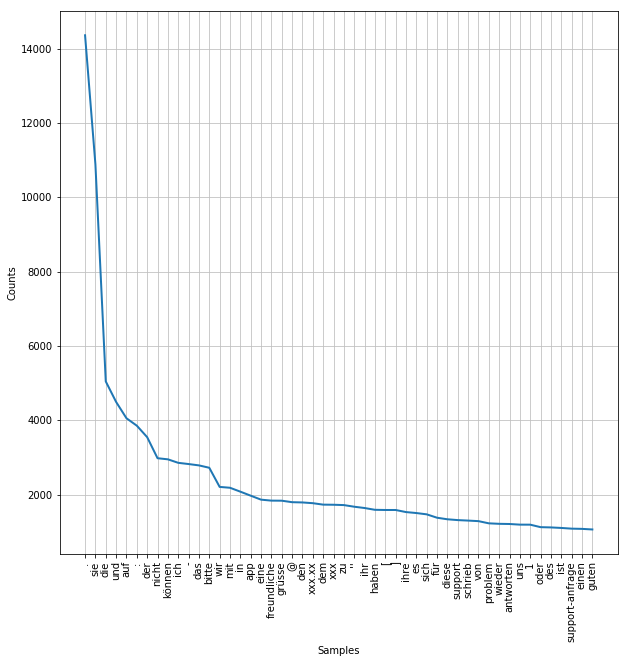

In [27]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 10]

fdist1.plot(50, cumulative=False)